In [ ]:
## Tyler Lizell Section A

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

pp_df = pd.read_csv('titanic.csv')
pp_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

Your written answer:

 - <Answer 1>
 - <Answer 2>
 - <Answer 3>

In [44]:
total_passengers = len(pp_df)

male_count = (pp_df['Sex'] == 1).sum()
male_percentage = (male_count / total_passengers) * 100

survival_percentage = (pp_df['Survived'].mean() * 100)

print("Total passengers:", total_passengers)
print("Percentage of males:", male_percentage, "%")
print("Survival percentage:", survival_percentage, "%")


Total passengers: 891
Percentage of males: 64.75869809203144 %
Survival percentage: 38.38383838383838 %


### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [50]:
total_females = (pp_df['Sex'] == 0).sum()
total_males = (pp_df['Sex'] == 1).sum()

female_survivors = pp_df[pp_df['Sex'] == 0]['Survived'].sum()
male_survivors = pp_df[pp_df['Sex'] == 1]['Survived'].sum()

female_survival_percentage = (female_survivors / total_females) * 100
male_survival_percentage = (male_survivors / total_males) * 100

print("% of females who survived:", female_survival_percentage, "%")
print("% of males who survived:", male_survival_percentage, "%")


% of females who survived: 74.20382165605095 %
% of males who survived: 18.890814558058924 %


Your written answer:

 - <Answer 1>
 - <Answer 2>

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [57]:
ticket_stats = pp_df.groupby('Pclass').agg(
    total_tickets=('Pclass', 'count'),
    survivors=('Survived', 'sum')
)

ticket_stats['ticket_percentage'] = (ticket_stats['total_tickets'] / len(pp_df)) * 100
ticket_stats['survival_percentage'] = (ticket_stats['survivors'] / ticket_stats['total_tickets']) * 100

print(ticket_stats[['ticket_percentage', 'survival_percentage']])

        ticket_percentage  survival_percentage
Pclass                                        
1               24.242424            62.962963
2               20.650954            47.282609
3               55.106622            24.236253


Your written answer:

 - Class 1 
    - % tickets:
    - % survivorship: 
- Class 2 
    - % tickets:
    - % survivorship: 
- Class 3
    - % tickets:
    - % survivorship: 


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

Survivors:
    Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0

Non-Survivors:
    Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


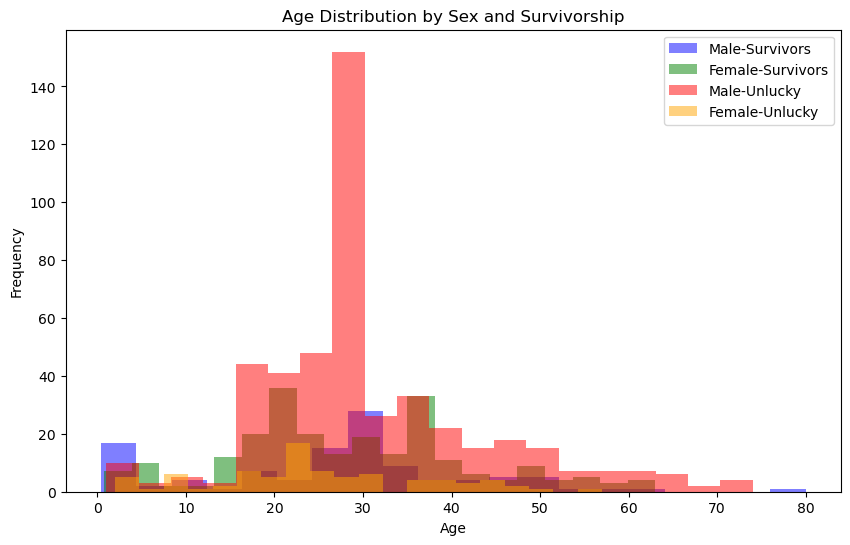

In [65]:
survivors_df = pp_df[pp_df['Survived'] == 1][['Age', 'Name', 'Sex']]
non_survivors_df = pp_df[pp_df['Survived'] == 0][['Age', 'Name', 'Sex']]

print("Survivors:")
print(survivors_df.head())

print("\nNon-Survivors:")
print(non_survivors_df.head())

plt.figure(figsize=(10, 6))

plt.hist(survivors_df[survivors_df['Sex'] == 1]['Age'], bins=20, alpha=0.5, label='Male-Survivors', color='blue')

plt.hist(survivors_df[survivors_df['Sex'] == 0]['Age'], bins=20, alpha=0.5, label='Female-Survivors', color='green')

plt.hist(non_survivors_df[non_survivors_df['Sex'] == 1]['Age'], bins=20, alpha=0.5, label='Male-Unlucky', color='red')

plt.hist(non_survivors_df[non_survivors_df['Sex'] == 0]['Age'], bins=20, alpha=0.5, label='Female-Unlucky', color='orange')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Sex and Survivorship')
plt.legend()

plt.show()

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

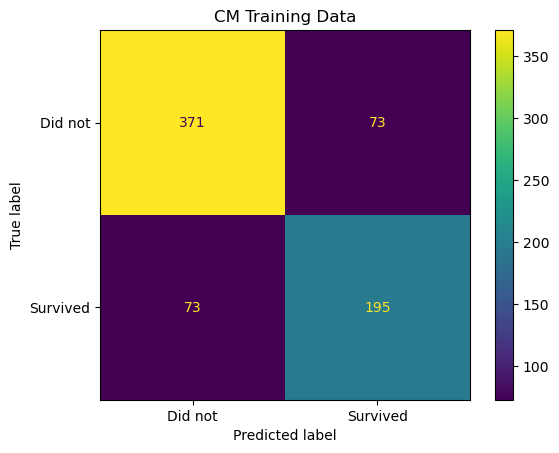

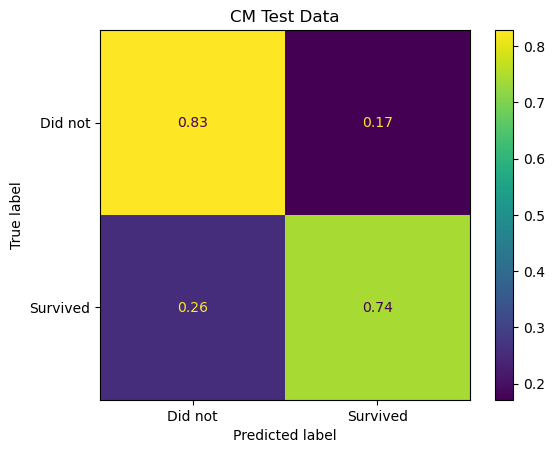

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay


features = ['Age', 'Sex']
label = 'Survived'

x_train, x_test, y_train, y_test = train_test_split(pp_df[features], pp_df[label], test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

knn_clf = KNeighborsClassifier(n_neighbors=25)

knn_clf.fit(x_train, y_train)

y_knn_train = knn_clf.predict(x_train)
y_knn_test = knn_clf.predict(x_test)

ConfusionMatrixDisplay.from_predictions(y_train, y_knn_train, display_labels=['Did not', 'Survived'])
plt.title("CM Training Data")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_knn_test, display_labels=['Did not', 'Survived'], normalize='true')
plt.title("CM Test Data")
plt.show()